# Text Preprocessing

In [1]:
coachella_tweets_link = "https://github.com/WebDevCaptain/nlp-review/raw/refs/heads/main/data/coachella-tweets.csv"

In [2]:
import pandas as pd

df = pd.read_csv(coachella_tweets_link, encoding='latin1')

df.head()

,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN


## Data exploration

In [3]:
df['text'][1]

'RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR'

In [4]:
df['text'][5]

'West side is the best side!\n#west #coas #Coachella2015 http://t.co/BhasNazMMU'

In [5]:
df['text'].apply(lambda x: len(x))

,text
0,114
1,93
2,61
3,145
4,82
...,...
3841,72
3842,107
3843,50
3844,58


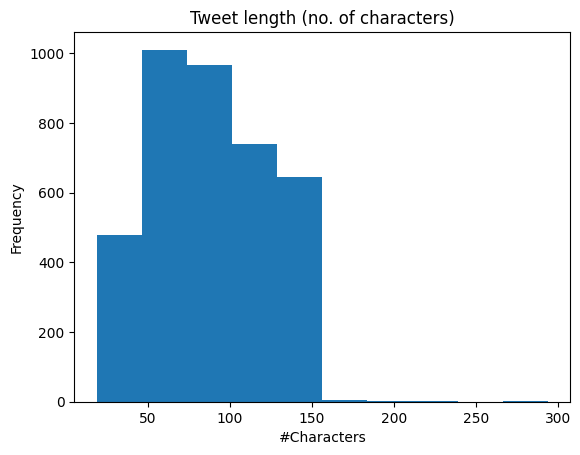

In [6]:
df['text'].apply(lambda x: len(x)).plot(
  kind='hist',
  bins=10,
  title="Tweet length (no. of characters)",
  xlabel="#Characters"
);

## Data cleaning

In [7]:
import re

def hashtags(text):
  """
  Find all hashtags within the tweet
  """
  hash = re.findall(r"#(\w+)", text)
  return hash

In [8]:
sampletweet = '#covid2020 #vaccines are being made #2020'

hashtags(sampletweet)

['covid2020', 'vaccines', '2020']

In [9]:
def remove_users(tweet):
  """
    Takes a string and removes retweet and @username info
  """
  tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
  return tweet

In [10]:
sampletweet = '@ewanw I love Esbuild and Figma!'

remove_users(sampletweet)

' I love Esbuild and Figma!'

In [11]:
def remove_links(tweet):
  """
    Takes a string and removes web links from it
  """
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly
  tweet = tweet.strip('[link]') # remove [links]
  return tweet

In [12]:
sampletweet = 'I love Esbuild ( https://esbuild.io ) and Figma! [link]'

remove_links(sampletweet)

'I love Esbuild (  ) and Figma! '

In [13]:
# Not recommended for production usecases, doin it for demo only
def clean_html(text):
  html = re.compile('<.*?>')
  return html.sub(r'', text)

In [14]:
sampletweet = 'I love <h1>Esbuild</h1> and Figma! [link]'

clean_html(sampletweet)

'I love Esbuild and Figma! [link]'

In [15]:
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

In [16]:
df['text'][1], df['text'][:2].apply(non_ascii).apply(lower)[1]

('RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR',
 'rt @sudsybuddy: wait this is absolute fire ___ #coachella2015 http://t.co/ov2ecjtavr')

## Stopwords removal

In [17]:
import nltk

nltk.download('stopwords') # For removing common filler words like "the" and "is."

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def remove_stop_words(text):
  # select english stopwords
  cachedStopWords = set(stopwords.words("english"))

  #add custom words
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))

  # remove stop words
  new_str = ' '.join([word for word in text.split() if word.lower() not in cachedStopWords]) # Here we are tokenizing the text using `.split()` method

  return new_str

In [19]:
# df['text'][1], df['text'][:2].apply(lower).apply(remove_stop_words)[1]

df['text'][1], df['text'][:2].apply(remove_stop_words)[1]

('RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR',
 'RT @sudsybuddy: WAIT ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR')

In [20]:
def clean_email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'', text)

In [21]:
sampletweet = '@ewanw I love Esbuild and Figma! Here is my email nerd@gmail.com'

clean_email_address(sampletweet)

'@ewanw I love Esbuild and Figma! Here is my email '

In [22]:
from nltk.tokenize import RegexpTokenizer

def punct(text):
  """
  Filter out non-word characters like - and $
  """
  token = RegexpTokenizer(r'\w+')
  text = token.tokenize(text)

  return " ".join(text)

punct("Hello there. I ate 5-9 $ pancakes")

'Hello there I ate 5 9 pancakes'

In [23]:
def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern, '', text)

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)

In [24]:
df.head()

,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN


In [25]:
df['hashtag'] = df.text.apply(func=hashtags)

df.head()

,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,hashtag
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito,[Coachella2015]
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN,[Coachella2015]
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN,"[Coachella2015, VIP]"
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito,"[Coachella2015, GovBall2015]"
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN,[Coachella2015]


In [26]:
# df['new_tweet'] = df.text \
#   .apply(remove_users) \
#   .apply(clean_html) \
#   .apply(non_ascii) \
#   .apply(lower) \
#   .apply(clean_email_address) \
#   .apply(remove_stop_words) \
#   .apply(punct) \


df['new_tweet'] = (
  df.text
  .apply(remove_users)
  .apply(clean_html)
  .apply(non_ascii)
  .apply(lower)
  .apply(clean_email_address)
  .apply(remove_stop_words)
  .apply(punct)
)

df.head()

,coachella_sentiment,coachella_yn,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,hashtag,new_tweet
0,positive,yes,kokombil,0,#Coachella2015 tickets selling out in less tha...,"[0.0, 0.0]",1/7/15 15:02,5.529630e+17,NaN,Quito,[Coachella2015],coachella2015 tickets selling less 40 minutes ...
1,positive,yes,MisssTaraaa10,2,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,NaN,1/7/15 15:02,5.529630e+17,united states,NaN,[Coachella2015],rt wait absolute fire ___ coachella2015 http t...
2,positive,yes,NMcCracken805,0,#Coachella2015 #VIP passes secured! See you th...,NaN,1/7/15 15:01,5.529630e+17,"Costa Mesa, CA",NaN,"[Coachella2015, VIP]",coachella2015 vip passes secured see bitchesssss
3,positive,yes,wxpnfm,1,PhillyÛªs @warondrugsjams will play #Coachell...,NaN,1/7/15 15:01,5.529630e+17,"Philadelphia, PA and Worldwide",Quito,"[Coachella2015, GovBall2015]",phillys play coachella2015 amp govball2015 wat...
4,positive,yes,Caesears,0,If briana and her mom out to #Coachella2015 i...,NaN,1/7/15 15:00,5.529630e+17,NaN,NaN,[Coachella2015],briana mom coachella2015 im ____


In [27]:
df['new_tweet'][0]

'coachella2015 tickets selling less 40 minutes ________________ http t co smoxyteimj'

In [28]:
# df['new_tweet'] = df.new_tweet.apply(remove_special_characters)
df['new_tweet'] = df.new_tweet.apply(remove_digits)

In [29]:
df['new_tweet'][0]

'coachella tickets selling less  minutes ________________ http t co smoxyteimj'